<a href="https://colab.research.google.com/github/Chaitrahooli/Machine-Learning-Project/blob/master/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow

# Image Classification using Transfer Learning
**(Differentiate Dogs from Cats)**



*   Transfer learning is a popular technique used in deep learning.
*   Transfer learning works for Iearning Image classification problem because neural network learns in an complex way.


* Neural Network trying to detect the faces,we notice that the network try to learns edges in the first layer and shapes in the second layer and some complex features in the deeper layer
*   Our problem isto differentiate the images of the dogs from the cats.

*  We can use the model that trained on huge datasets containing different types of animals.
*   We need a network that already trained on large image data sets like ImageNet(contains 1.4 millions  labeled images and 1000 different categories of images including animals and every day objects ).







The [Datasets](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition) contain the images of the cats and dogs .
It contains two folders :

*   **train** folder contains 25,000 images of cats and dogs.Each image in this folder has the label as the part of the filename.
*   **test** folder contains the 12,500 images named according the numeric id

*   For each image in the test set you should predict the probability that the image is dog(1=dog,0=cat).







# Importing the datasets from kaggle
 First Install kaggle

In [0]:
!pip install kaggle

Then upload the kaggle json file

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chaitra95hooli","key":"9b44918981534fcc4d5e3d2c111669a9"}'}

Then do the below changes of the file permission 

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#change the permission
!chmod 600 ~/.kaggle/kaggle.json

Then download the datasets, just by copying the download link of the datasets

In [3]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 96% 260M/271M [00:03<00:00, 56.7MB/s]
100% 271M/271M [00:03<00:00, 85.3MB/s]
 98% 531M/544M [00:05<00:00, 102MB/s]
100% 544M/544M [00:05<00:00, 111MB/s]
  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 36.2MB/s]


The downloaded datasets are in the zip file then we have to unzip the file

In [0]:
from zipfile import ZipFile
file_name= "train.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [0]:
from zipfile import ZipFile
file_name="test.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


Pandas is the high level datamanupulation tool,It is built on numpy packages and it's key structure is called the DataFrame(DataFrame allows you to store and manupulate the tabular data in rows of observations and columns of variables ).

In [0]:
import pandas as pd

#Importing the some packages we use

*  **cv2** is also called OpenCv,is a image and vedio processing laibrary used for python and  many other high level programming languages
*   **Numpy** it makes working and computing large multidimentional array and matrices super easy and fast,It has a large number of mathametical functions too operate in theses arrays.

*   **pandas** is a laibrary we wriiten in python programming languages used for data manupulation and analysis.
*   **matplotlib** is a plotiing laibrary for python.

*   **os** is built in python package for accessing your computer and file system,It can be used to display the content in directories.
*   **random** will help us to create the random numbers which will be used to split or shuffle our data sets.

* **gc** is a garbage collector is a important tool for manually cleanung and deleting the unnecessary files.   










In [0]:
import pandas as pd
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

Here we create a file path for train and test data

In [0]:
train_dir="train"
test_dir="test"

Here we create the two variables **train_dogs** and **train_cats**  one containing the all the images of dogs and other containing all the images of cats.we write the list comprehension that uses the command **os.listdir()** to get the all the images in the train data zip file and retrive all the images with the dog in their name,do the same for cat images.  

*   get the test images too
*   we have to extract 2000 images of both the classes.

*  So we grab the first 2000 images of dogs and cats and then concatinate them into one train set called **train_imgs**
*   randomly shuffle the **train_imgs**(very important).





In [0]:
import random
train_dogs=["train/{}".format(i)for i in os.listdir(train_dir)if 'dog' in i]
train_cats=["train/{}".format(i)for i in os.listdir(train_dir)if 'cat'in i]
test_imgs=["test/{}".format(i)for i in os.listdir(test_dir)]
train_imgs=train_dogs[:2000]+train_cats[:2000]
random.shuffle(train_imgs)

to get the first three images in **train_imgs**

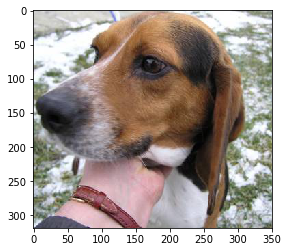

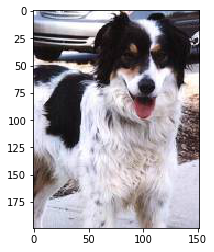

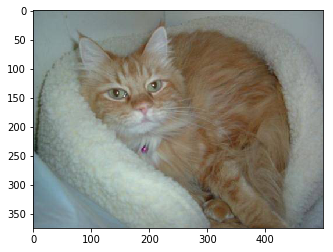

In [0]:
import matplotlib.image as mpimg
for ima in train_imgs[0:3]:
  img=mpimg.imread(ima)
  imgplot=plt.imshow(img)
  plt.show()

Size of the image is different we have to resize it using cv2

*   lets declare the new dimention we want 
*   I am using 150 by 150 for hight and width and 3 channels.

*   coloured image is made up of 3 channel ie 3 is red,green,blue pixel value
*   use 1 if you want greyscale image






In [0]:
nrows=150
ncolumns=150
channels=3

Then we defining a function that resize our image as we specified above.

*   First we declare the two empty lists named  as **X** and **y**
*   In a for loop we iterate the train images and append the resized images in the list **X**.

*   If image is dog then append 1 to list **y** otherwise append 0
*   Then for last step the function returns the **X** and **y** values





In [0]:
def read_process_img(list_of_imgs):
  X=[]
  y=[]
  for image in list_of_imgs:
    X.append(cv2.resize(cv2.imread(image,cv2.IMREAD_COLOR),(nrows,ncolumns),interpolation=cv2.INTER_CUBIC))
    if 'dog' in image:
      y.append(1)
    elif 'cat' in image:
      y.append(0)
  return X,y
  

call the function **read_process_img**

In [0]:
X,y=read_process_img(train_imgs)

Display both **X** and **y** values

In [0]:
X[0]

array([[[209, 207, 207],
        [208, 206, 206],
        [202, 199, 199],
        ...,
        [169, 177, 170],
        [194, 201, 192],
        [205, 210, 201]],

       [[209, 209, 209],
        [208, 208, 208],
        [204, 204, 204],
        ...,
        [138, 150, 143],
        [142, 152, 143],
        [142, 150, 140]],

       [[207, 207, 207],
        [205, 205, 205],
        [206, 205, 205],
        ...,
        [129, 144, 137],
        [137, 151, 140],
        [121, 135, 124]],

       ...,

       [[244, 237, 225],
        [234, 224, 214],
        [249, 242, 234],
        ...,
        [ 82,  97,  85],
        [ 75,  92,  82],
        [ 87, 104,  93]],

       [[253, 239, 230],
        [242, 226, 218],
        [117,  96,  91],
        ...,
        [ 79, 101,  92],
        [ 78, 102,  95],
        [ 77, 100,  93]],

       [[237, 219, 212],
        [116,  96,  89],
        [103,  79,  75],
        ...,
        [ 74, 101,  96],
        [ 78, 106, 103],
        [101, 128, 127]]

In [0]:
y

[1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,


Then display the resizable images.
**subplot()** function  can be called  to plot two or more plots in one figure

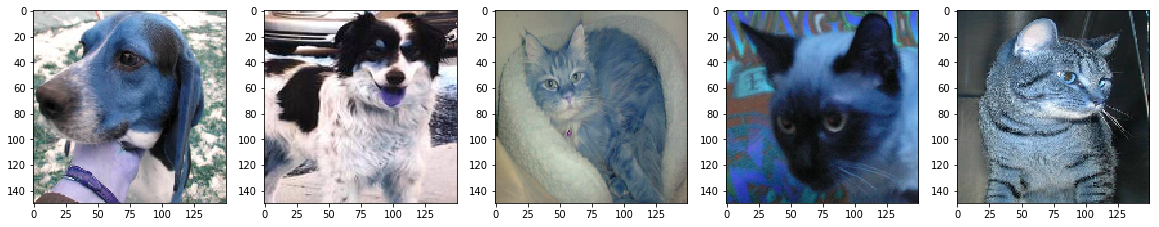

In [0]:
#after resize the size of the array
plt.figure(figsize=(20,10))
columns=5
for i in range(columns):
  plt.subplot(5/columns+1,columns,i+1)
  plt.imshow(X[i])




*   import the **seaborn** packages 
*   convert the X and y list into **numpy** array

*   plot the graph that conferm number of classes in your **y** label using **countplot**






Text(0.5, 1.0, 'Labels for dogs and dogs')

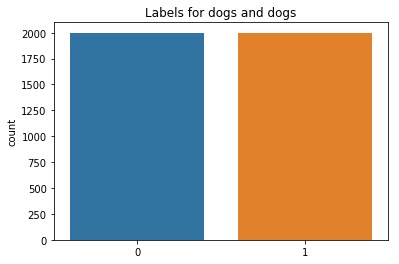

In [0]:
import seaborn as sns
#convert the list into numpy array
X=np.array(X)
y=np.array(y)
sns.countplot(y)
plt.title("Labels for dogs and dogs")

Determine the shape of **X** and **y** numpy array

In [0]:
print("Shape of the train images",X.shape)
print("Shape of the labels",y.shape)

Shape of the train images (4000, 150, 150, 3)
Shape of the labels (4000,)


Now split our data into train and validation set.

*  import **train_test_split** from **sklearn** packages
*   Split the data into **80%** of training set and **20%** of test set.

*   Now print the shape of the new train and test  datasets.





In [0]:
#let split the data into the train and test
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=2)
print("Shape of the training images",X_train.shape)
print("Shape of the label is",X_val.shape)
print("Shape of the training images",y_train.shape)
print("shape of the label is",y_val.shape)

Shape of the training images (3200, 150, 150, 3)
Shape of the label is (800, 150, 150, 3)
Shape of the training images (3200,)
shape of the label is (800,)


Declare the two variables **ntrain** and **nval** assign the corresponding length of the **X_train** and **X_val**

Assign **batch_size** as 32

In [0]:
#get the length of the training and labels
ntrain=len(X_train)
nval=len(X_val)
batch_size=32#batch_size should be the factor of 2 ie 2,4,6,8.....

Importing the keras application document **InceptionResNetV2**.

*   Here we tell the keras to download the pretrained weights and save it into the variable **conv_base**
*   **weights(imagenet)** we tell keras to fetch the InceptionResNetV2 that was trained on the **imagenet** datasets.

*   **include_top(false)** we tell keras not to  download the fully connected layers.This is because top layers does the final classification. 






In [0]:
#using the transfer learning we can easily recognize the images
from keras.applications import InceptionResNetV2
conv_base=InceptionResNetV2(weights='imagenet',include_top=False,input_shape=(150,150,3))

Using TensorFlow backend.
W0625 04:57:16.990456 140236049311616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0625 04:57:17.007538 140236049311616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0625 04:57:17.012208 140236049311616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0625 04:57:17.037716 140236049311616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0625 



*   import the keras layers which contains the different types of layers used in deep learning.
*  Convolutional layer(used in computer vision)
*   Pooling layer(Computer Vision)
*  Recurrent layer(Sequential and time series modelling)
*  Embedding layer(Natural Language Processing) 

*   Normalization layers
*   Import the keras model there are two types:Sequential model and model with functional API.

*   import the **keras optimizer**  a module that contain the different type of back propogation algorithm for training our model some are:
      
      **Sgd (Stocastic gradient descent)
      
      **rmsprop(root mean square propogation)
      
      **Adams
      
      **Adagrad
      
      **Adadelta
*   Next we import ImageDataGenerator is used when working with the small dataset 







In [0]:
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array,load_img




*   **model.Sequential()** tells keras to stack all layers sequentially

*   We create the first layer by calling the **.add()** function on the model and we created  **conv2D** layer, this layer passes the following parameters:

        **filter_size[32]:size of the output dimention(number of out put filters in convolution)
        **kernel_size[3,3]:specifies the width of the 2D convolutional window
        **activation[relu]:we select activation function relu it is the most common activation function used today.
        **input_shape[150,150,3]:it is the resized dimention of the image
*   We add **MaxPooling2D** it helps to reduces the  special size  of the incoming features and helps to reduces the amount of the parameters and computation in the network and there by reduces the overfitting. 

*   We add the **flatten()** layer: A conv2D layer extract and learns the spacial features it isthen passed to the Dense layer after it has been flattened
*   We add the **Dropout** layer with the value 0.5 this layer drops randomly some layer in neural network and then learns with the reduced network. **0.5** means to randomly drop half of the layer.

*   The last layer has the output function 1 and different activation function called **sigmoid**, this function takes the set of numbers and returns the probability distribution in the range 0 and 1.
 









In [0]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) #Dropout(rate=0.5)
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

W0625 04:57:50.817287 140236049311616 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


depreciation warning is due to the Dropout layer in tf.keras.layers.Dropout.
To avoid this warning, you need to clearly specify rate= in Dropout as: Dropout(rate=0.5). 


**summary()** function can preview the arrangements and parameter size.

In [0]:
conv_base.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 74, 74, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 74, 74, 32)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

Now we want to pass it to the fully connected layer that means we flatten the conv_base layer 

In [0]:
model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 3, 3, 1536)        54336736  
_________________________________________________________________
flatten_2 (Flatten)          (None, 13824)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               3539200   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 57,876,193
Trainable params: 57,815,649
Non-trainable params: 60,544
_________________________________________________________________


In [0]:
print("Number of trained variables before feezing the conv_base",len(model.trainable_weights))
conv_base.trainable=False
print('Number of trained variables after freezing the conv base',len(model.trainable_weights))



Number of trained variables before feezing the conv_base 492
Number of trained variables after freezing the conv base 4




*   **loss[binary_crossentropy]**:here we specify the loss function that our optimizer minimizes 
*   **RMSprop** is the hyper parameter that we want to specify having the linear rate 0.0002



In [0]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])

W0625 04:58:11.644341 140236049311616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0625 04:58:11.657300 140236049311616 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




*   Here we pass the rescale parameter in the ImageDataGenerator which is having the value **rescle=1./255**, it normalizes the image pixel value to have the 0 mean and  standard deviation of 1
*   **ImageDataGenerator** will randomly apply some transfermations.

*   we also ceate the **ImageDataGenerator**  object for the validation set also.






In [0]:
#lets create the agumentation configuration
#this prevents the overfitting
train_datagen=ImageDataGenerator(rescale=1./255,#rescale the image between 0 and 1
                                  rotation_range=20,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
val_datagen=ImageDataGenerator(rescale=1./255)# we donot agument the validation data we only perform rescale  

Here we created **X_train** ,**y_train** for training generator and **X_val** ,**y_val** for validation generator.

In [0]:
train_generator=train_datagen.flow(X_train,y_train,batch_size=batch_size)
val_generator=val_datagen.flow(X_val,y_val,batch_size=batch_size)

Now we train our network calling the **fit()** method

*   Here we specify the number of **steps_per_epoch** this tells our model howmany images we want to process before making gradient update to our loss function, a total of 3200 images divided by 32 we will gives 100 steps 
*   **epochs**  is a full cycle or pass through the entire training set,epochs is reached when we make 100 gradient updates 

*   we pass the validation data generator 
*   we specify the steps size here too





In [0]:
history=model.fit_generator(train_generator,
                            steps_per_epoch=ntrain // batch_size,
                            epochs=20,
                            validation_data=val_generator,
                            validation_steps=nval // batch_size
                            )

Epoch 1/20
100/100 [==============================] - 455s 5s/step - loss: 0.4955 - acc: 0.7528 - val_loss: 0.2020 - val_acc: 0.9387
Epoch 2/20
100/100 [==============================] - 449s 4s/step - loss: 0.3865 - acc: 0.8222 - val_loss: 0.2657 - val_acc: 0.9437
Epoch 3/20
100/100 [==============================] - 451s 5s/step - loss: 0.3641 - acc: 0.8403 - val_loss: 0.2266 - val_acc: 0.9537
Epoch 4/20
100/100 [==============================] - 451s 5s/step - loss: 0.3384 - acc: 0.8466 - val_loss: 0.2463 - val_acc: 0.9463
Epoch 5/20
100/100 [==============================] - 453s 5s/step - loss: 0.3423 - acc: 0.8413 - val_loss: 0.2521 - val_acc: 0.9563
Epoch 6/20
100/100 [==============================] - 453s 5s/step - loss: 0.3353 - acc: 0.8544 - val_loss: 0.2545 - val_acc: 0.9525
Epoch 7/20
100/100 [==============================] - 453s 5s/step - loss: 0.3073 - acc: 0.8684 - val_loss: 0.2643 - val_acc: 0.9550
Epoch 8/20
100/100 [==============================] - 452s 5s/step - 

Now we want to plot the accuracy and loss  of the both training and validation.

**history()** :this contains all updates that happened during training.

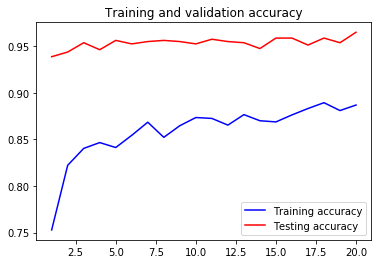

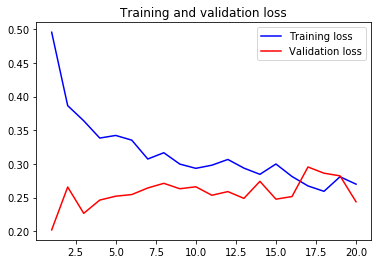

In [0]:
#let the plot of the train and validation curve
#getting the details from history
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)
#train and validation accuracy
plt.plot(epochs,acc,'b',label='Training accuracy')
plt.plot(epochs,val_acc,'r',label='Testing accuracy')
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()
#training and validation loss
plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title("Training and validation loss")
plt.legend()

plt.show()



*   We read and convert the first 10 images in the test set to the list of array.  
*   convert the list into numpy array.

*   We create the test ImageDataGenerator and and perform the normalization only.





In [0]:
#lets predict the first 10 images of the test set
X_test,y_test=read_process_img(test_imgs[0:10])
x=np.array(X_test)
val_datagen=ImageDataGenerator(rescale=1./255)



*   creating one empty list called **text_labels**.
*   we set the figure size of the image that we were going to plot 

*   Now we iterate the image of the validation set
*   predict the perticular image provided by the ImageDataGenerator by calling the **predict()** method.

*   If the predicted value is greater than 0.5 then in the **text_labels** list append as **dog** otherwise append as **cat**
*   Then we finally plot the multiple images using the **subplot**.

*   Then we add the predicted class as the title in the image plot.










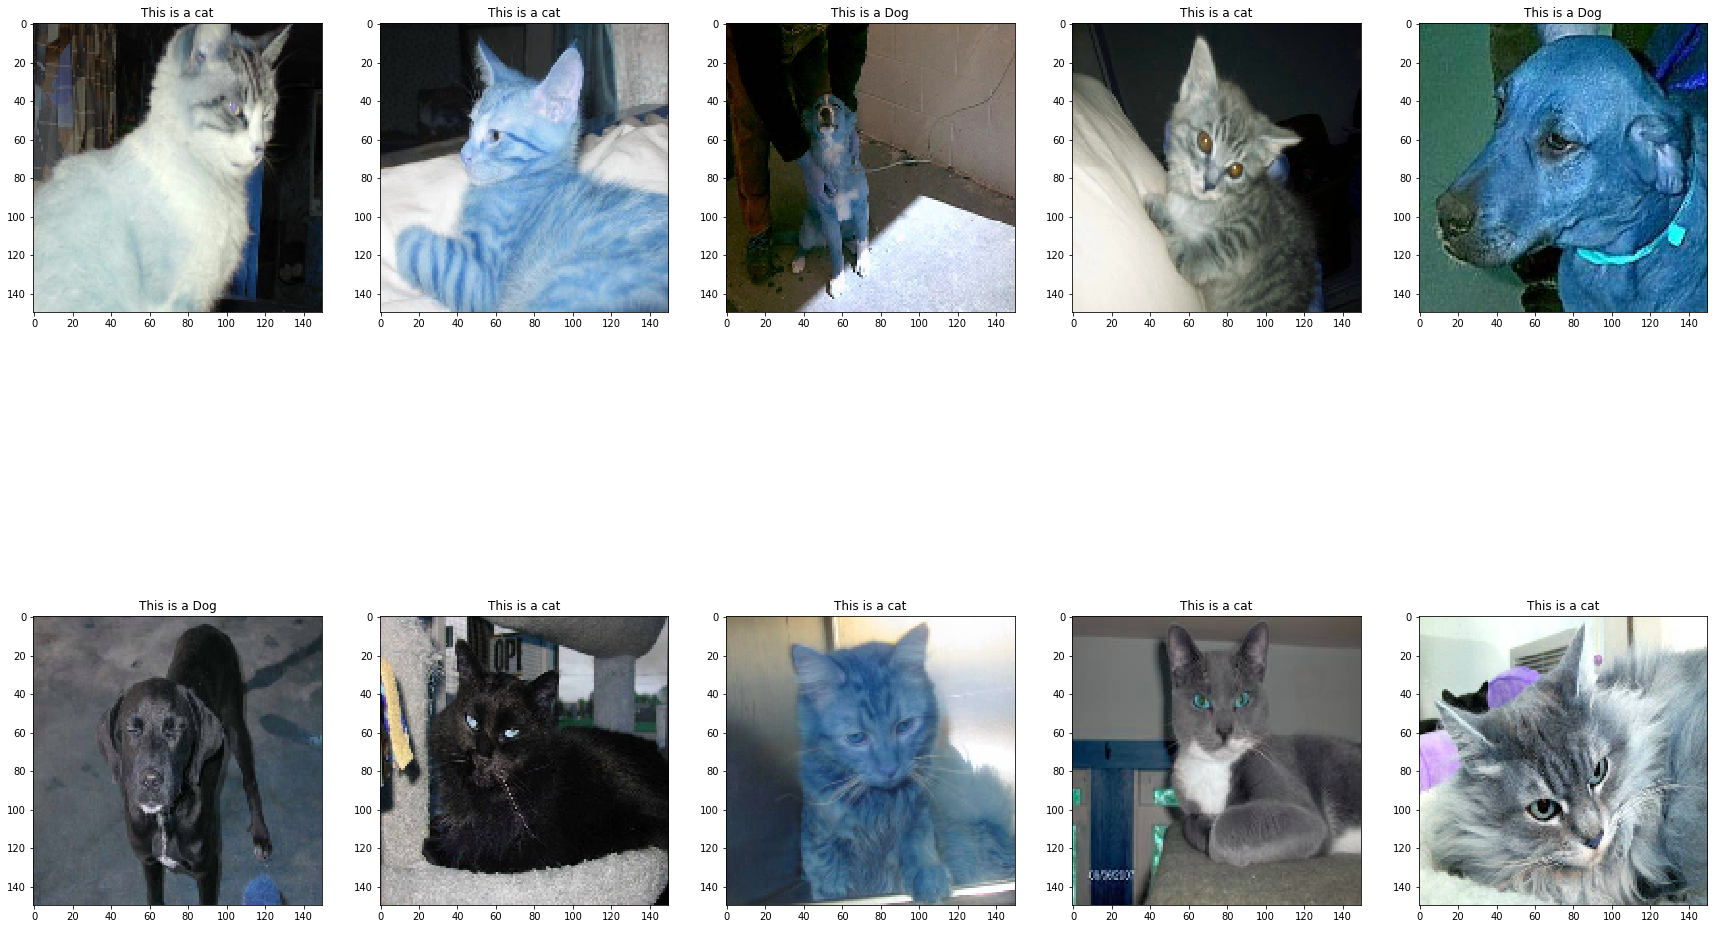

In [0]:
i=0
text_labels=[]
plt.figure(figsize=(30,20))
for batch in val_datagen.flow(x,batch_size=1):
    pred=model.predict(batch)
    if pred > 0.5:
        text_labels.append('Dog')
    else:
        text_labels.append('cat')
    plt.subplot(5 / columns + 1,columns,i+1)
    plt.title("This is a"+" "+text_labels[i])
    imgplot=plt.imshow(batch[0])
    i+=1
    if i%10==0:
        break

plt.show()